# Using Python For the First Time (Part II): Data Cleaning

Data cleaning is the process of preparing data for analysis by identifying and fixing problems with the data. This can include things like: 
- removing missing or duplicate values, 
- correcting inaccuracies, and 
- formatting data in a consistent way. 

Data cleaning is important because if the data is not cleaned, the results of any analysis or decision making using that data may be inaccurate or unreliable. It is a necessary and critical step in the data analysis process.

## Load Packages and Data

First we need to load our packages.. Or in this case package. As discussed in the previous Python for the first time session, Pandas is a powerful Python library used for data manipulation and analysis. Therefore, it is capable of accomplishing all of the data cleaning steps by itself.

If pandas is not already installed, we can install it by navigating back to the launcher by clicking the blue '+' in the top left, just above your files.
Then, open a 'terminal' and type `pip install pandas`. Please see the first session notebook for more information.

In [1]:
import pandas as pd

Next, we import our dataset. Remember from the last session, we can do this using the Pandas function `pd.read_csv(...)`, entering our file path between the brackets and assigning the results to the variable `data`.

In [2]:
data = pd.read_csv('data_raw.csv')

data

,Survey Date,What is your age?,What is your gender?,Are you self-employed?,How many employees does your company or organization have?,How many years have you worked for your current organization (or been self employed)?,Do you currently have a mental health disorder?,"If yes, what condition(s) have you been diagnosed with?"
0,01/01/2022,39,Male,0,26-100,19.13,No,NaN
1,01/01/2022,28,Male,0,26-100,8.63,Yes,"Mood Disorder (Depression, Bipolar Disorder, etc)"
2,01/01/2022,26,Male,0,2025-06-01 00:00:00,2.55,No,NaN
3,01/01/2022,32,non-binary,0,100-500,7.57,Yes,"Mood Disorder (Depression, Bipolar Disorder, etc)"
4,01/01/2022,34,Male,1,NaN,13.22,Yes,"Mood Disorder (Depression, Bipolar Disorder, e..."
...,...,...,...,...,...,...,...,...
1428,10/01/2022,39,male,0,More than 1000,17.48,No,NaN
1429,10/01/2022,28,Male,0,100-500,15.19,Yes,"Anxiety Disorder (Generalized, Social, Phobia,..."
1430,10/01/2022,36,Male,0,100-500,1.93,Yes,"Mood Disorder (Depression, Bipolar Disorder, etc)"
1431,10/01/2022,41,male,0,More than 1000,15.92,Yes,Attention Deficit Hyperactivity Disorder


For this exercise, we are using some example survey data from Kaggle, collecting information around mental health in tech roles. Please see https://www.kaggle.com/datasets/osmi/mental-health-in-tech-2016 for more information. For the purposes of this exercise, some additional fields have been added.

printing the dataset by typing `data`, we notice a few issues with the data immediately, including:

- There are spaces and special characters such as a question mark in the column names. These are not allowed in column names because they can cause issues with syntax and make the column name harder to reference. Typically, the special characters are removed and spaces are replaced with a different character, such as an underscore, in order to be used in queries or code.

- The `Survey Date` field appears to be in the wrong date format. In Python, dates are written in the format: `YYYY-MM-DD` to standardise from the different conventions between countries such as the UK and US versions (`DD/MM/YYYY` vs `MM/DD/YYYY`).

- There seems to be errors in certain columns, such as line 2 for the `How many employees does your company or organization have?`, where there is a date instead of an amount of employees specified. Furthermore, for the `What is your gender?` column, there is multiple distinct entries for males, including `"male", "Male" and "MALE"`.

- Finally, there are some NULL values, represented in Python by either `None` or `NaN` such as line 0 for the `If yes, what condition(s) have you been diagnosed with?` column.

Addressing each issue in order, we start with renaming the columns.

## Rename Columns

To access the columns names of the dataset, we simply use the following, remembering that we manipulate datasets by supplying the name, followed by a `.` and then a function.

In [3]:
data.columns

Index(['Survey Date', 'What is your age?', 'What is your gender?',
       'Are you self-employed?',
       'How many employees does your company or organization have?',
       'How many years have you worked for your current organization (or been self employed)?',
       'Do you currently have a mental health disorder?',
       'If yes, what condition(s) have you been diagnosed with?'],
      dtype='object')

To change the column names, we simply need to create a list of our new names, wrapping them in square brackets and then assigning this to the dataset names like so.

In [4]:
columns = ['survey_date', 
           'age', 
           'gender', 
           'self_employed',
           'number_of_employees',
           'years_employed',
           'has_mental_health', 
           'conditions']

data.columns = columns

Alternatively, the list of names can be supplied to the `pd.read_csv(...)` command via `names = columns`. Doing this, we must also supply `header = 0` to make sure it doesn't include our original headers from the first row of the file.

In [5]:
data = pd.read_csv('data_raw.csv', names = columns, header = 0)

Printing the first two rows of the dataset, we can see that the names have been changed.

In [6]:
data.head(2)

,survey_date,age,gender,self_employed,number_of_employees,years_employed,has_mental_health,conditions
0,01/01/2022,39,Male,0,26-100,19.13,No,NaN
1,01/01/2022,28,Male,0,26-100,8.63,Yes,"Mood Disorder (Depression, Bipolar Disorder, etc)"


## Convert Data Types

Within Pandas data frames, there are different types of data that can be used. These types include:

- Datatime (`datetime`): This data type is used to hold date and time.
- Integer (`int`): this is a whole number, like `1`, `2`, or `-5`.
- Numeric (`float`): this is a number with a decimal point, like `3.14` or `-0.01`.
- Boolean (`bool`): this is a type that can have only two values: `True` or `False`.
- Character or String (`object` or `str`): this is a type that holds words or sentences, like `"Hello World"` or `"dog"`. Strings can be enclosed in single or double quotes and can include letters, numbers, and symbols.

Each column in a DataFrame can have a different data type, and pandas automatically assigns a data type to a column when the data is loaded into the DataFrame. However, you can also explicitly specify the data type of a column when creating a DataFrame or convert the data type of a column later on.

Each type of data has its own specific use and rules. For example, you can't apply maths with a word but you can with a number.
It is important to use the right type of data in the right place so that the program can understand it and use it correctly.

Finally, each data frame has an index which can be either an integer or a label, and it is used to identify and reference the rows of the DataFrame. In the above data, you can see the index on the far left, starting from 0 and ending at 1432. 


Additionally, there exists many formats for storing data including:

- Data Frames (`pd.DataFrame`): this is exclusively controled by the Pandas package is an formatted nXm matrix containing all of our rows and columns.
- Series or List (`pd.Series` or `list`): this is a type that holds a group of items, like a list of numbers `[1,2,3]`. You can also imagine this as a single column of a dataframe.
- Dictionary (`dict`): this is a type that holds a group of items, like a list, but each item has a name called key. An example would be `{"Key1": Value1, "Key2": Value2}`.
- Tuple (`tuple`): this is a type similar to a list, but the items cannot be changed once created.
- Set (`set`): this is a type that holds a group of unique items, like a set of numbers `{1,2,3}`.

A good first check on any dataset is to check the associated type of each column to make sure it is as expected. We can do this by running `data.dtypes` below. A good first check on any dataset is to check the associated type of each column to make sure it is as expected. We can do this by running `data.dtypes` below.

In [7]:
data.dtypes

survey_date             object
age                     object
gender                  object
self_employed            int64
number_of_employees     object
years_employed         float64
has_mental_health       object
conditions              object
dtype: object

From the above we can see that the `survey_date` and `age` columns are incorrectly classified as an `object`, where they should be `datetime` and `int` respectively. Additionally, `self_employed` could be converted to `bool`, where 1 = True and 0 = False.

To convert `survey_date` into `datetime`, we use the pandas function `pd.to_datetime(...)`, supplying the date column (remeber we access specific columns via square brackets) and the format. Note here that the format is what the data currently is, not what it is being converted into. A full list of formats can be found here: https://www.w3schools.com/python/python_datetime.asp.

In [8]:
data['survey_date'] =  pd.to_datetime(data['survey_date'], format='%d/%m/%Y')

To convert `self_employed` into `bool`, we simply apply `.astype('bool')` to the column.

In [9]:
data['self_employed'] = data['self_employed'].astype('bool')

Finally, attempting the cast `age` to the `int` type using the same method, we receive an error that the field contains words, which are not allowed under the integer type. Therefore, we must first remove these values before we can convert.

In [10]:
# data['age'] = data['age'].astype(int)

In [11]:
data

,survey_date,age,gender,self_employed,number_of_employees,years_employed,has_mental_health,conditions
0,2022-01-01,39,Male,False,26-100,19.13,No,NaN
1,2022-01-01,28,Male,False,26-100,8.63,Yes,"Mood Disorder (Depression, Bipolar Disorder, etc)"
2,2022-01-01,26,Male,False,2025-06-01 00:00:00,2.55,No,NaN
3,2022-01-01,32,non-binary,False,100-500,7.57,Yes,"Mood Disorder (Depression, Bipolar Disorder, etc)"
4,2022-01-01,34,Male,True,NaN,13.22,Yes,"Mood Disorder (Depression, Bipolar Disorder, e..."
...,...,...,...,...,...,...,...,...
1428,2022-01-10,39,male,False,More than 1000,17.48,No,NaN
1429,2022-01-10,28,Male,False,100-500,15.19,Yes,"Anxiety Disorder (Generalized, Social, Phobia,..."
1430,2022-01-10,36,Male,False,100-500,1.93,Yes,"Mood Disorder (Depression, Bipolar Disorder, etc)"
1431,2022-01-10,41,male,False,More than 1000,15.92,Yes,Attention Deficit Hyperactivity Disorder


## Detect Outliers with Functions

To detect outliers, we can take a count of each distinct value in a column and sort the count in descending order. We do so below, applying `.value_counts()` and `.sort_values(ascending = False)` to the column `survey_date`. Remember here, you can specify a `\` to tell Python that code is going on to a new line for neatness.

In [12]:
data['survey_date'].value_counts() \
                   .sort_values(ascending = False)

2022-01-02    144
2022-01-03    144
2022-01-04    143
2022-01-05    143
2022-01-06    143
2022-01-07    143
2022-01-08    143
2022-01-09    143
2022-01-10    143
2022-01-01    138
2025-06-01      5
2023-05-01      1
Name: survey_date, dtype: int64

Here we can see that two future dates have been used: `2025-06-01` and `2023-05-01` which haven't occured yet and must be wrong. We will deal with these in the next section.

To repeat this process for all of our columns, one can simply copy and paste the above code multiple times and replace `survey_date` with a different column name. A more elegant way however would be to use a function.

In Python, a function is a block of code that can be reused multiple times. Functions help to organize and structure code, making it easier to read and understand. Functions are defined using the "def" keyword, followed by the name of the function, and a set of parentheses `()` that can include input parameters. The code that makes up the function **MUST** be indented, using the TAB button on your keyboard and placed underneath the definition.

For example, the following code defines a function called "greet" that takes in a name as a parameter and prints out a greeting:

In [13]:
def greet(name):
    print('Hello, ' + name + '!')

greet('John')
greet('Jane')

Hello, John!
Hello, Jane!


In this example, the function "greet" is defined on the first line, and it is called twice on the last two lines, with the input parameters "John" and "Jane" respectively.
Functions can also return a value using the return statement, which allows you to use the result of the function in other parts of your code. 

Here's an example of a function that takes in two numbers and returns the sum of them:

In [14]:
def add(a, b):
    x = a + b
    return x

result = add(3, 4)
result

7

In this example, the function add takes in two numbers a and b and return their sum. The return statement allows the function to output the sum, which is then stored in the variable result and printed out.

To generalise our code into a function called `my_counter`, we specify `column` as the input and replace `'survey_date'` above with the input `column`. Finally, we assign the output to result and add `return result` so that the function returns an output. Without this line, the function would do nothing.

In [15]:
def my_counter(column):
    result = data[column].value_counts() \
                         .sort_values(ascending = False)
    return result

Running the function with `'survey_date'`, we receive the same output as before.

In [16]:
my_counter('survey_date')

2022-01-02    144
2022-01-03    144
2022-01-04    143
2022-01-05    143
2022-01-06    143
2022-01-07    143
2022-01-08    143
2022-01-09    143
2022-01-10    143
2022-01-01    138
2025-06-01      5
2023-05-01      1
Name: survey_date, dtype: int64

Finally, we can redo the function to add some extra functionality. Namely, we supply `dropna = False` within `.values_counts()` to also count NULL values and we add `normalize = prop` to optionally turn the counts into proportions, where `prop` is an additional input supplied. Notice here that we have done `prop = False` which tells Python that by default, prop is equal to `False`. Doing this means that we don't need to supply prop each time, just if we want to change `prop` to `True`.

In [17]:
def my_counter(column, prop = False):
    result = data[column].value_counts(normalize = prop, dropna = False) \
                         .sort_values(ascending = False)
    return result

In [18]:
my_counter('survey_date', prop = True)

2022-01-02    0.100488
2022-01-03    0.100488
2022-01-04    0.099791
2022-01-05    0.099791
2022-01-06    0.099791
2022-01-07    0.099791
2022-01-08    0.099791
2022-01-09    0.099791
2022-01-10    0.099791
2022-01-01    0.096301
2025-06-01    0.003489
2023-05-01    0.000698
Name: survey_date, dtype: float64

## Fixing Data Errors with Conditional Filtering

To fix data errors, we either replace the error in question with:

- a NULL value, indicating that it is "non-applicable" or
- an appropriate value. 

In the latter case, there a few options including the mean/median/mode of the column, the previous value and others. It's important to know your data before applying any of these, as any of these methods can lead to lose of information.

Typically, we would go through each column of the data individually, identifying any errors and dealing with them.

### Survey Date

Returning to the `survey_date` column from the previous section, we already identified that two future dates have been used: `2025-06-01` and `2023-05-01` which haven't occurred yet and must be a mistake. We can filter our data like so, to indentify the full rows where these errors occur. Remember from the previous session, we apply this to `data` by wrapping our filters in square brackets. If there is more than one filter, each filter must also be wrapping in circle brackets. The `|` symbol represents 'or'.

In [19]:
data[(data['survey_date'] == '2025-06-01') | (data['survey_date'] == '2023-05-01')]

,survey_date,age,gender,self_employed,number_of_employees,years_employed,has_mental_health,conditions
31,2025-06-01,32,Female,False,2025-06-01 00:00:00,7.23,Yes,"Anxiety Disorder (Generalized, Social, Phobia,..."
37,2025-06-01,35,Female,False,500-1000,11.71,No,NaN
45,2025-06-01,40,Male,True,NaN,14.15,No,NaN
53,2023-05-01,22,Male,True,NaN,22.13,Maybe,NaN
88,2025-06-01,31,Female,False,2025-06-01 00:00:00,10.92,Maybe,NaN
140,2025-06-01,28,female,False,2025-06-01 00:00:00,17.03,Maybe,NaN


Given that the dataset is a survey, we suspect that each row was entered chronologically as a new response come through. Therefore, we inspect the previous rows of each error, by specifying a list of index numbers to test our theory. Since we are filtering by a list of values, these must be wrapped in additional square brackets.

In [20]:
data['survey_date'][[30, 36, 44, 52, 87, 139]]

30    2022-01-01
36    2022-01-01
44    2022-01-01
52    2022-01-01
87    2022-01-01
139   2022-01-01
Name: survey_date, dtype: datetime64[ns]

As suspected, it looks like all of these responses should have occurred on the 1st Jan 2022. Therefore, we use if/else logic where if the `survey_date` column is equal to either of the two erroneous dates, then they should be replaced with `'2022-01-01'`. To do this, we use`.loc` at the front of the dataset to indicate that we are wanting to replace values. Then we must supply the column that we want to change at the end after our filters. Finally, we assign a new value at the end.

**Remember here that `==` is where something is equal to something else. `=` is used to assign a result to variable.**

In [21]:
data.loc[(data['survey_date'] == '2025-06-01') | (data['survey_date'] == '2023-05-01'), 'survey_date'] = '2022-01-01'

We can check this worked by filtering where the index of the data was equal to 31, which we know was one of the rows with an error from above.

In [22]:
data[data.index == 31]

,survey_date,age,gender,self_employed,number_of_employees,years_employed,has_mental_health,conditions
31,2022-01-01,32,Female,False,2025-06-01 00:00:00,7.23,Yes,"Anxiety Disorder (Generalized, Social, Phobia,..."


### Age

Applying `my_counter()` to `age`, we identify three errors: `'thirty six'`, `'forty three'` and `'twenty nine'` where the ages have been wrote as text. 

In [23]:
my_counter('age')

30             94
31             82
29             78
28             74
35             74
32             72
34             69
33             69
26             64
27             63
37             59
39             55
38             54
36             49
25             44
24             42
40             36
22             32
44             31
42             29
43             29
45             27
41             24
23             24
46             22
21             15
47             14
49             13
55             12
50              9
48              9
51              7
54              7
52              7
20              6
56              5
63              4
57              4
19              4
53              3
61              2
59              2
forty three     1
15              1
74              1
3               1
65              1
twenty nine     1
70              1
323             1
thirty six      1
62              1
17              1
99              1
66              1
58        

We can again filter the dataset to see the full rows. This time we can use the `.isin()` function, specifying a list of values rather than three individual filters for ease.

In [24]:
data[data['age'].isin(['thirty six', 'forty three', 'twenty nine'])]

,survey_date,age,gender,self_employed,number_of_employees,years_employed,has_mental_health,conditions
77,2022-01-01,twenty nine,M,False,26-100,9.67,No,NaN
103,2022-01-01,forty three,Female,False,More than 1000,9.56,No,NaN
152,2022-01-02,thirty six,Male,False,2023-05-01 00:00:00,16.87,Yes,"Anxiety Disorder (Generalized, Social, Phobia,..."


To use our logic from the `survey_date` example, we would have to supply three separate filters and replacements here with the below:

```
data.loc[data['age'] == 'thirty six', 'age'] = '36'
data.loc[data['age'] == 'forty three', 'age'] = '43'
data.loc[data['age'] == 'twenty nine', 'age'] = '29'
```

Alternatively, we can create a dictionary here. Remember from above that a dictionary is simply a list of values with names, wrote in the format: `{'key1': value1, 'key2': value2}`. Here, the `key:value` pairs here are the current values and replacements. We then use `.replace({column: our_dictionary})` to replace the values.

In [25]:
numbers = {
  'thirty six': 36,
  'forty three': 43, 
  'twenty nine': 29
}

data = data.replace({'age': numbers})

Remembering our inability to cast the `age` column to an integer from before, we can now do so!

In [26]:
data['age'] = data['age'].astype(int)

Now that `age` is an integer, we can check for outliers within the column by filtering the data where the age is less than equal to 18 or greater than equal to 80.

In [27]:
data[(data['age'] <= 18) | (data['age'] >= 80)]

,survey_date,age,gender,self_employed,number_of_employees,years_employed,has_mental_health,conditions
325,2022-01-03,99,Other,False,2025-06-01 00:00:00,17.07,Yes,Traumatic Brain Injury
441,2022-01-04,17,male,False,2025-06-01 00:00:00,8.63,No,NaN
631,2022-01-05,323,Male,False,100-500,14.77,No,NaN
926,2022-01-07,3,Male,False,More than 1000,10.07,Maybe,NaN
1227,2022-01-09,15,male,True,NaN,20.81,No,NaN


Here, one could imagine that a 17 year old could realistically work for a tech company while the others are unlikely. Therefore we use `.loc` to replace the values below 15 and greater or equal to 80 with the mean of the `age` column. Notice we add `.astype(int)` to round the mean to a whole number.

In [28]:
data.loc[(data['age'] <= 16) | (data['age'] >= 80), 'age'] = data['age'].mean().astype(int)

We can again check this worked by supplying the index of one of the outlier rows.

In [29]:
data[data.index == 631]

,survey_date,age,gender,self_employed,number_of_employees,years_employed,has_mental_health,conditions
631,2022-01-05,34,Male,False,100-500,14.77,No,NaN


### Gender

Looking at the values for `gender`, there are a lot of distinct values that exist for male, female and other genders. 

In [30]:
my_counter('gender')

Male                610
male                249
Female              153
female               95
M                    86
                   ... 
human                 1
Bigender              1
female/woman          1
Cisgender Female      1
MALE                  1
Name: gender, Length: 71, dtype: int64

Typically, we would look to identify trends in the names to alter all of them into a single format. Here however, there is a lot of distinct response with no real pattern. Therefore, it is easiest to create two lists, one for all of the male values and one for the female values. Then we just have to use `.replace(list, replacement_value)` to replace each value with either `'male'` or `'female'`. For all of the remaining responses, we can then use `.value_counts()` to count and sort for each value, then filter the top two results which will be `'male'` and `'female'` from our previous replacements.

In [31]:
male = ['Male', 'male', 'M', 'm', 'Cis Male', 'man', 'ostensibly male, unsure what that really means', 'Mail', 'Make', 'male (cis)', 
        'cis male', 'maile', 'Malr', 'Cis Man', 'Mal', 'msle', 'male.', 'sex is male', 'malr', 'cis man', 'mail' ]
     
female = ['Female', 'female', 'F', 'f', 'Woman', 'Femake', 'Female (cis)', 'cis female', 'woman', 'femail', 
         'cis-female/femme', 'i identify as female.', 'cis-woman', 'cisgender female', 'female (props for making this a freeform field, though)', 
         'female/woman', 'female assigned at birth' ]

data['gender'] = data['gender'].replace(male, 'male')
data['gender'] = data['gender'].replace(female, 'female')

other = list(data['gender'].value_counts().index)[2:]
data['gender'] = data['gender'].replace(other, 'other')

In [32]:
my_counter('gender')

male      1032
female     317
other       81
NaN          3
Name: gender, dtype: int64

### Self Employed Flag

Applying the counter for `self_employed`, there doesn't appear to be any errors. 

In [33]:
my_counter('self_employed')

False    1146
True      287
Name: self_employed, dtype: int64

Additionally, we apply the counter to `self_employed` and `number_of_employees` together in a list, to make sure nobody who is self employed has a value for number of employees. Thankfully, that is true here. However, from the `number_of_employees` column, we can see there are two incorrect values `'2025-06-01 00:00:00'` and `'2023-05-01 00:00:00'`.

In [34]:
my_counter(['self_employed', 'number_of_employees'])

self_employed  number_of_employees
False          26-100                 292
True           NaN                    287
False          More than 1000         256
               100-500                248
               2025-06-01 00:00:00    210
               500-1000                80
               2023-05-01 00:00:00     60
dtype: int64

### Number of Employees

Again, we provide a list of "correct" values and replace where if the value is not in the list, we assign a NULL value of `None`. Note here, the terminology for "not in" is supplying a `~` just after the opening square bracket.

In [35]:
categories = ['26-100', '100-500', '500-1000', 'More than 1000']
data.loc[~(data['number_of_employees'].isin(categories)), 'number_of_employees'] = None

In [36]:
my_counter('number_of_employees')

None              557
26-100            292
More than 1000    256
100-500           248
500-1000           80
Name: number_of_employees, dtype: int64

### Years Employed

The `years_employed` field is strangely a float type, containing decimals and numbers. Therefore we can use `data.describe()` to see statistics about the field such as the min, max, mean and others.

In [37]:
data.describe()

,age,years_employed
count,1433.000000,1433.000000
mean,34.073971,11.454794
std,8.084754,6.553567
min,17.000000,0.020000
25%,28.000000,5.880000
50%,33.000000,11.680000
75%,38.000000,16.870000
max,74.000000,22.990000


Again all looks good here, though this field should probably be an integer. We can convert by first applying `np.floor()` from the numpy package, to round every value down and then cast as an integer.

In [38]:
import numpy as np
data['years_employed'] = np.floor(data['years_employed']).astype(int)

In [39]:
data.head(2)

,survey_date,age,gender,self_employed,number_of_employees,years_employed,has_mental_health,conditions
0,2022-01-01,39,male,False,26-100,19,No,NaN
1,2022-01-01,28,male,False,26-100,8,Yes,"Mood Disorder (Depression, Bipolar Disorder, etc)"


### Has Mental Health Flag

`has_mental_health` flag seems okay too.

In [40]:
my_counter('has_mental_health')

Yes      575
No       531
Maybe    327
Name: has_mental_health, dtype: int64

## Conditions

Finally, `conditions` looks like it contains a list of answers for each of the conditions the person specified. We notice there is quite a lot of NULL values (865 / 1432) here.

In [41]:
my_counter('conditions')

NaN                                                                                                                                                                                                                                              865
Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                            117
Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                                                                                102
Anxiety Disorder (Generalized, Social, Phobia, etc)                                                                                                                                                                                               47
Anxiety Disorder (Ge

Out of curiousity, we check if this is when the person has specified they don't have mental health, which for the most part appears to be true, apart from a small amount of cases.

In [42]:
data[(data['has_mental_health'] == 'Yes') & (data['conditions'].isnull())]

,survey_date,age,gender,self_employed,number_of_employees,years_employed,has_mental_health,conditions
169,2022-01-02,45,female,False,500-1000,17,Yes,NaN
461,2022-01-04,34,male,True,None,4,Yes,NaN
591,2022-01-05,21,male,False,More than 1000,3,Yes,NaN
632,2022-01-05,35,female,False,100-500,4,Yes,NaN
781,2022-01-06,33,male,False,100-500,12,Yes,NaN
808,2022-01-06,40,female,False,None,18,Yes,NaN
1395,2022-01-10,27,male,False,More than 1000,18,Yes,NaN


## Null Values

For the last step, we need to handle the NULL values within the dataset. NULL values exist where there doesn't exist a value for that particular row/column. There are several techniques for handling missing data, depending on the specific situation and the type of data. Some common techniques include:

- Filling the missing value with an appropriate measure such as mean, median, or value from the previous row.
- Dropping the rows that contain the NULL values. This is only effective if there a small amount of rows to be removed, to not lead to loss of information.
- Dropping the columns that contains NULLs, often if there are two many to extract any insights from that column.
- Keeping the NULLs and filling with a placeholder such as -1 or NA to extract insights from where the values are NULL.

It's important to note that there isn't one best method to handle missing data, the best method will depend on the specific dataset and problem, it is recommended to try different methods and compare the results.

To identify which rows and columns contain nulls, we use the `.isnull()` function. We can then add a `.sum()` and `.sort_values()` to identify the amount per column.

In [43]:
data.isnull() \
    .sum() \
    .sort_values(ascending = False)

conditions             865
number_of_employees    557
gender                   3
survey_date              0
age                      0
self_employed            0
years_employed           0
has_mental_health        0
dtype: int64

Given the `gender` column has only three NULL values, we can simply remove these rows by filtering where the values are not null and assigning that back to data.

In [44]:
data = data[~data['gender'].isnull()]

On the flip side, `conditions` is made up mostly of NULLs but this is because the majority of the dataset have expressed that they don't have mental health, as we saw above. However, this field is very messy and is not likely to be useful for insights. Therefore, we can use `.drop()` to remove the column, specifying `axis = 1` to tell the function to look within the columns. To remove rows, you can use `axis = 0.`

In [45]:
data = data.drop('conditions', axis = 1)

Finally, for the `number_of_employees` column, we know there is a NULL value when the employee is self employed. Therefore, we can fill where this is true with a `'Self Employed'` tag.

In [46]:
data.loc[data['self_employed'] == True, 'number_of_employees'] = 'Self Employed'

In [47]:
data.isnull() \
    .sum() \
    .sort_values(ascending = False)

number_of_employees    270
survey_date              0
age                      0
gender                   0
self_employed            0
years_employed           0
has_mental_health        0
dtype: int64

From the above, there still exists NULL values within `number_of_employees` so we fill this with an 'NA' placeholder to plot later.

In [48]:
data.loc[data['number_of_employees'].isnull(), 'number_of_employees'] = 'NA'

In [49]:
data.isnull() \
    .sum() \
    .sort_values(ascending = False)

survey_date            0
age                    0
gender                 0
self_employed          0
number_of_employees    0
years_employed         0
has_mental_health      0
dtype: int64

## Analysis using Seaborn and Loops

In the previous session, we plotted our data using the `matplotlib` package. This time will focus on the `seaborn` package which arguably creates nicer looking visuals compared with the former. We first must load `seaborn` and `matplotlib`, which we will use in conjunction with `seaborn` to view the plots. If these are not installed, one can do `pip install ...` in the terminal as we saw before.

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

First we need to gather some data to plot. As we did above, we use `value_counts()` to count each value combination, convert the result to a dataset with `reset_index()` and rename our count column to `count` using the `.rename()` function.

In [51]:
df = data[['gender', 'has_mental_health']].value_counts() \
                                          .rename('count') \
                                          .reset_index()

In [52]:
df

,gender,has_mental_health,count
0,male,No,417
1,male,Yes,359
2,male,Maybe,256
3,female,Yes,169
4,female,No,93
5,female,Maybe,55
6,other,Yes,44
7,other,No,21
8,other,Maybe,16


We can also add the proportion per `gender` by dividing each `count` value by the sum of each `gender` value via the `.transform('sum')` command. Note we can use `normalize = True` within `.value_counts()` above, as this takes the proportion for all values, not specifically to `gender`.

In [53]:
df['proportion'] = df['count'] / df.groupby('gender')['count'].transform('sum')

In [54]:
df

,gender,has_mental_health,count,proportion
0,male,No,417,0.404070
1,male,Yes,359,0.347868
2,male,Maybe,256,0.248062
3,female,Yes,169,0.533123
4,female,No,93,0.293375
5,female,Maybe,55,0.173502
6,other,Yes,44,0.543210
7,other,No,21,0.259259
8,other,Maybe,16,0.197531


We then plot the `proportion` on the y axis, with each `gender` on the x axis, and `has_mental_health` as the colour. Notice the code here is relatively similar to the `matplotlib` layout in the previous session. We:
- Setup the plot with `plt.figure()` and `plt.figure(figsize=(...))`
- Plot via `sns.barplot(...)`. One can choose from many plots here such as `sns.lineplot(...)`, we just choose a barplot in this case.
- Then set labels and a title after with `.set_xlabel()`, `.set_ylabel` and `.set_title` respectively.

Text(0.5, 1.0, 'Proportion of those who have mental health by Gender')

<Figure size 640x480 with 0 Axes>

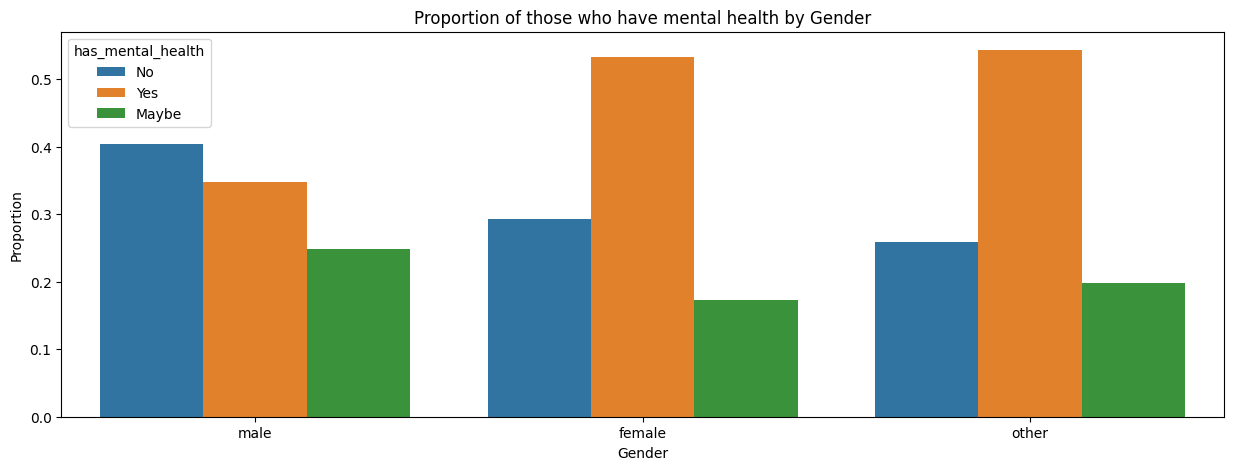

In [55]:
plt.figure()
plt.figure(figsize=(15, 5))
plot = sns.barplot(data=df, x='gender', y='proportion', hue='has_mental_health')
plot.set_xlabel('Gender')
plot.set_ylabel('Proportion')
plot.set_title('Proportion of those who have mental health by Gender')

If we wanted to plot this for the other columns, we could repeat the process: counting per variable, calculating the proportion and plotting again. However a much more elegant way to do this would be to use a "for loop".

### Loops

In Python, loops are used to repeatedly execute a block of code. There are two types of loops: for loops and while loops.
- A "for loop" is used when you know in advance how many times you want to repeat the actions. For example, if you have a list of 5 items, and you want to print each of them one by one, you would use a for loop. A "for loop" iterates over a sequence (such as a list, tuple, or string) and execute the same block of code for each item in the sequence. The basic syntax is:

```
for variable in sequence:
    # code to be executed
```

- A "while loop" is used when you don't know in advance how many times you want to repeat the actions, but you have a certain condition that tells you when to stop. For example, if you want to keep asking a user for their name until they enter it correctly, you would use a while loop. A "while loop" is used to repeatedly execute a block of code as long as a certain condition is true. The basic syntax is:

```
while condition:
    # code to be executed
```

It's important to be careful when using while loops, because if the condition that tells you when to stop is never met, the loop will repeat forever, which is called an infinite loop.

In this session we will only be covering "for loops". An example would be the following, where for each value between 1 and 5, we want to print each value multiplied by 50.

In [56]:
for i in [1, 2, 3, 4, 5]:
    print(50 * i)

50
100
150
200
250


Given our list of columns, we can use a "for loop" to iterate through the columns and plot for each.

In [57]:
data.columns

Index(['survey_date', 'age', 'gender', 'self_employed', 'number_of_employees',
       'years_employed', 'has_mental_health'],
      dtype='object')

We copy the above code and simply replace `'gender'` with the generic `column` placeholder where each value in `['gender', 'self_employed', 'number_of_employees']` will be inputted in the place of it. For the title on the last line, since our variable will change for each plot, we simply use string manipulating to input the column name within the title to tell the graphs apart.

<Figure size 640x480 with 0 Axes>

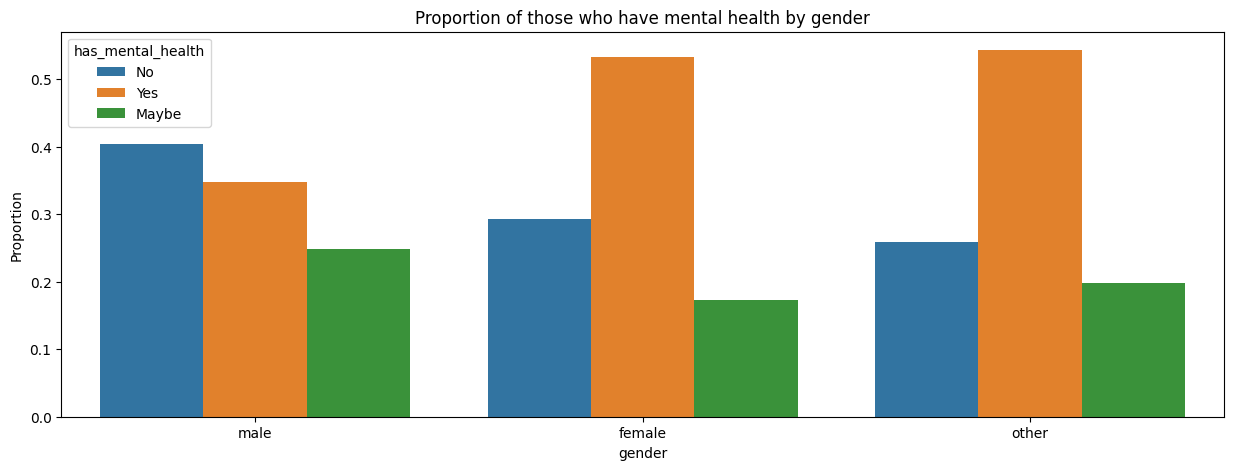

<Figure size 640x480 with 0 Axes>

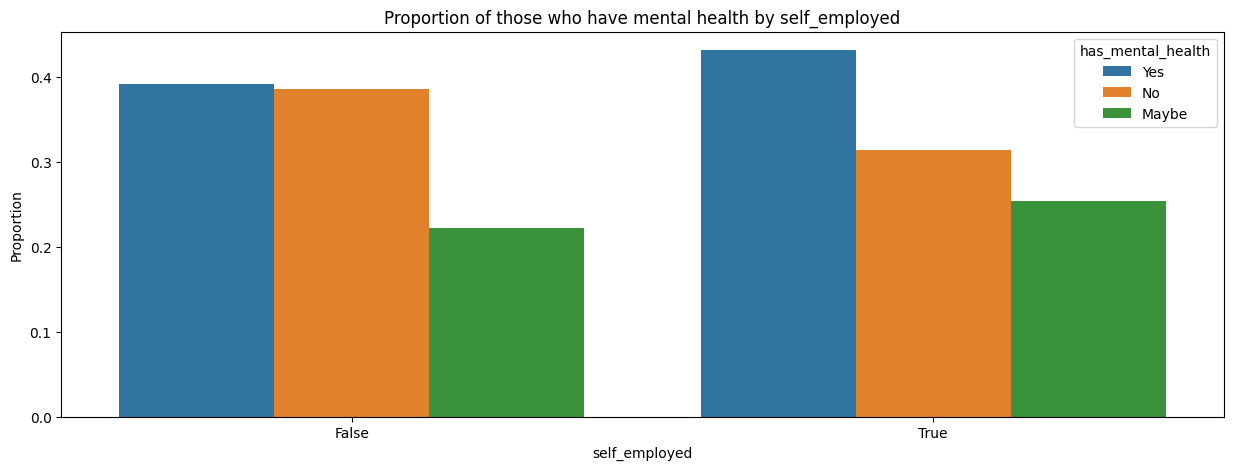

<Figure size 640x480 with 0 Axes>

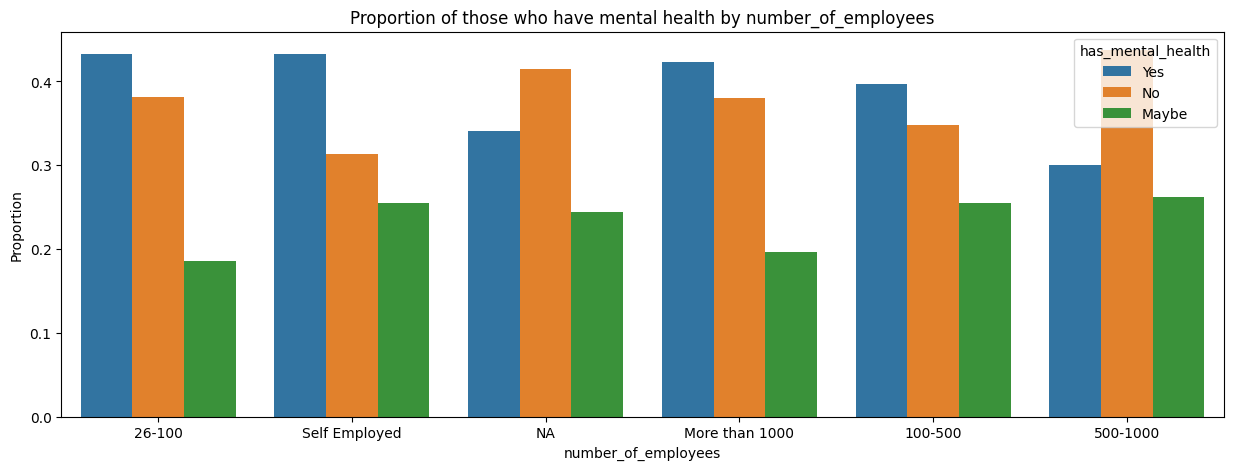

In [58]:
for column in ['gender', 'self_employed', 'number_of_employees']:
    df = data[[column, 'has_mental_health']].value_counts() \
                                            .rename('count') \
                                            .reset_index()

    df['proportion'] = df['count'] / df.groupby(column)['count'].transform('sum')

    plt.figure()
    plt.figure(figsize=(15, 5))
    plot = sns.barplot(data = df, x = column, y = 'proportion', hue = 'has_mental_health')
    plot.set_xlabel(column)
    plot.set_ylabel('Proportion')
    plot.set_title('Proportion of those who have mental health by ' + column)

In addition to the above, you can also use functions in conjunction with loops. In the below function `my_plotter()` we have copied the code again and replaced 'has_mental_health' with a `legend_col` input in the function, to be able to dynamically specify which column determines the colour of the graph. Again for the title, we need to dynamically add this using string manipulation again.

In [59]:
def my_plotter(column, legend_col):
    df = data[[column, legend_col]].value_counts() \
                                 .rename('count') \
                                 .reset_index()

    df['proportion'] = df['count'] / df.groupby(column)['count'].transform('sum')

    plt.figure()
    plt.figure(figsize=(15, 5))
    plot = sns.barplot(data = df, x = column, y = 'proportion', hue = legend_col)
    plot.set_xlabel(column)
    plot.set_ylabel('Proportion')
    plot.set_title('Proportion of ' + legend_col + ' by ' + column)

Plotting for `gender` and `has_mentaL_health` again using the function returns the previous graph.

<Figure size 640x480 with 0 Axes>

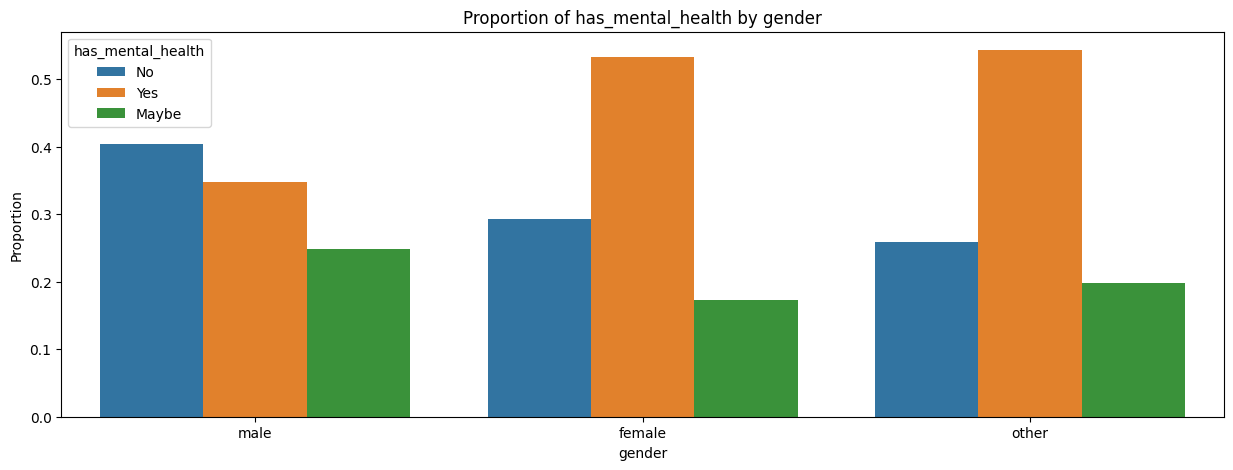

In [60]:
my_plotter('gender', 'has_mental_health')

We can now create a "for loop" that iterates through `['gender', 'self_employed']`, applying each one as inputs to the function and taking `number_of_employees` as the colour each time.

<Figure size 640x480 with 0 Axes>

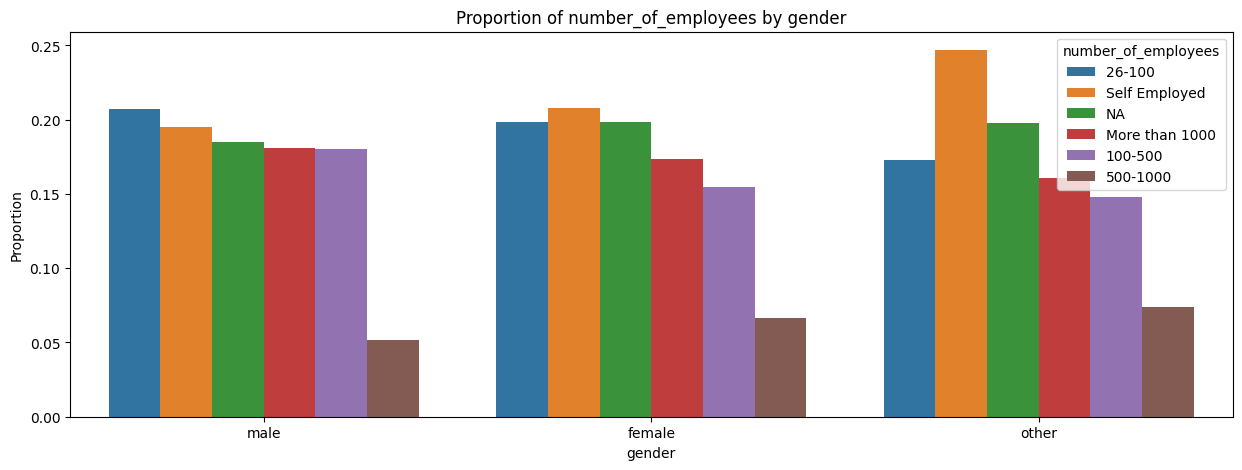

<Figure size 640x480 with 0 Axes>

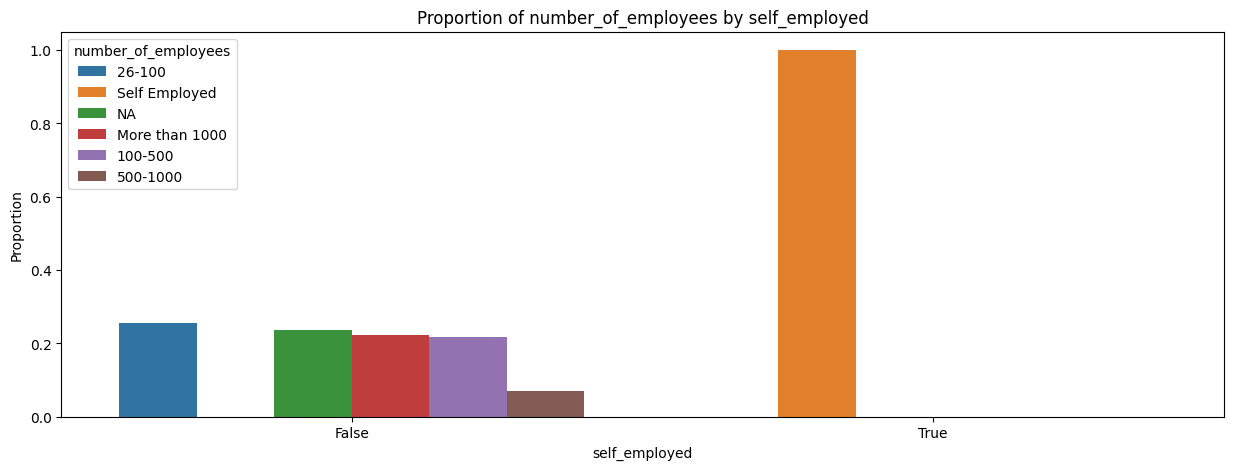

In [61]:
for column in ['gender', 'self_employed']:
    my_plotter(column, 'number_of_employees')

# Close Python

Don't forget to shut down all notebooks by clicking the stop button at the top right of the page. Then close Python by doing File/Shut Down.

# Useful resources

https://stackoverflow.com/

https://pandas.pydata.org/docs/

https://www.datacamp.com/tracks/python-fundamentals

https://chat.openai.com/